<a href="https://colab.research.google.com/github/Aash94/Seoul-Bike-Sharing-Demand-Prediction-EDA-Regression-Classification-Unsupervised/blob/main/Bike_Sharing_demand_Prediction_capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**    - Seoul Bike Sharing Demand Prediction

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Aasheerwad Sharma

# **Project Overlook -**

***Problem Statement*** -

Many urban cities are currently introducing rental bikes in order to improve mobility comfort. Obtaining the right bike count for stable supply of rental bikes is important to make the rental bike available and accessible to the public at the right time, thereby reducing waiting times. A stable supply of rental bikes becomes a major issue for the city as time goes on.

***Describing dataset*** -

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

***Dataset Information*** -

Date : year-month-day

Rented_Bike_Count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##**Data Exploration** -

***Importing required Libraries***

In [2]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

import warnings
warnings.filterwarnings('ignore')



In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###***Data Diagnosing*** -

In [4]:
df_seolbike = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin',)


In [5]:
#let's make a copy of dataset for safety purpose
df_seolbikedata = df_seolbike.copy()

In [6]:
df_seolbikedata.shape

(8760, 14)

In [7]:
df_seolbikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes


In [8]:
df_seolbikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df_seolbikedata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01-12-2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.000,NaN,NaN,NaN,704.602,644.997,0.000,191.000,504.500,1065.250,3556.000
Hour,8760.000,NaN,NaN,NaN,11.500,6.923,0.000,5.750,11.500,17.250,23.000
Temperature(°C),8760.000,NaN,NaN,NaN,12.883,11.945,-17.800,3.500,13.700,22.500,39.400
Humidity(%),8760.000,NaN,NaN,NaN,58.226,20.362,0.000,42.000,57.000,74.000,98.000
Wind speed (m/s),8760.000,NaN,NaN,NaN,1.725,1.036,0.000,0.900,1.500,2.300,7.400
Visibility (10m),8760.000,NaN,NaN,NaN,1436.826,608.299,27.000,940.000,1698.000,2000.000,2000.000
Dew point temperature(°C),8760.000,NaN,NaN,NaN,4.074,13.060,-30.600,-4.700,5.100,14.800,27.200
Solar Radiation (MJ/m2),8760.000,NaN,NaN,NaN,0.569,0.869,0.000,0.000,0.010,0.930,3.520
Rainfall(mm),8760.000,NaN,NaN,NaN,0.149,1.128,0.000,0.000,0.000,0.000,35.000


In [10]:
#let's convert few names for smoothening
df_seolbikedata.rename ({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [11]:
df_seolbikedata.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [12]:

#let's check null values
df_seolbikedata.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [13]:
#let's check duplicate values
df_seolbikedata.duplicated().value_counts()

False    8760
dtype: int64

In [14]:
#Extracting day name, month and year, from date column

df_seolbikedata["Date"] = pd.to_datetime(df_seolbikedata["Date"])

df_seolbikedata["weekday"] = df_seolbikedata["Date"].dt.day_name()
df_seolbikedata["day"] = df_seolbikedata["Date"].dt.day
df_seolbikedata["Month"] = df_seolbikedata["Date"].dt.month
df_seolbikedata["Year"] = df_seolbikedata["Date"].dt.year

df_seolbikedata.drop("Date", axis=1, inplace=True)

In [15]:
df_seolbikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  weekday                8760 non-null   object 
 14  day                    8760 non-null   int64  
 15  Mont

In [16]:
df_seolbikedata.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,weekday,day,Month,Year
0,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Thursday,12,1,2017


#***Exploratory Data Analysis***

Primary goal was to explore data, to identify relationship between different features to answer the question to achieve the objective of the project using univariate analysis, bivariate analysis and multivariate analysis.

What feature will help in achieving stable bike demand every hour?

***Visualization***

Different form of charts are used to visualize data with respect to bike count (target value), to know how it can be related to other features. Visualization is carried out using **seaborn** and **matplotlib** library.

In [17]:


#Creating a copy
df_seolbikedata1 = df_seolbikedata.copy()

In [18]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df_seolbikedata1[col].unique())

In [19]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday', 'weekday']
cat_unique_vals(categorical_columns,df_seolbikedata1)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']
The values that the categorical column weekday can take are: ['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday']


We'll perform further checks for the values that categorical columns can take.

In [20]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return df_seolbikedata1.groupby(col)['Rented_Bike_Count'].sum().reset_index()

In [21]:


#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

,Seasons,Rented_Bike_Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


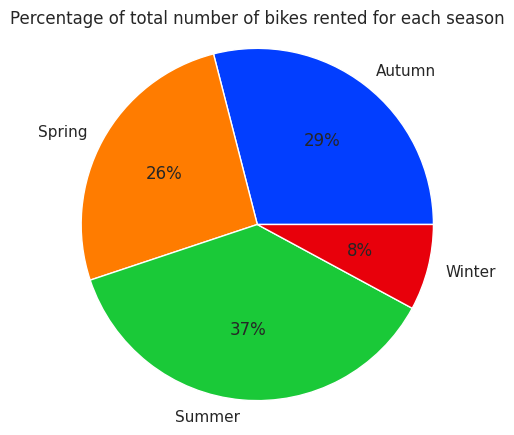

In [22]:
#Initial preparations for plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented_Bike_Count'])
palette_color = sns.color_palette('bright')
explode = (0.00,0.00,0.00,0.00)

#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")
plt.show()

As we can see that summer has the highest number of bikes rented, 37%. This could be because of the vacation mood created in summer and also the increase in the number of tourists. Winter however is the season where the least number of bikes are rented, 8%.

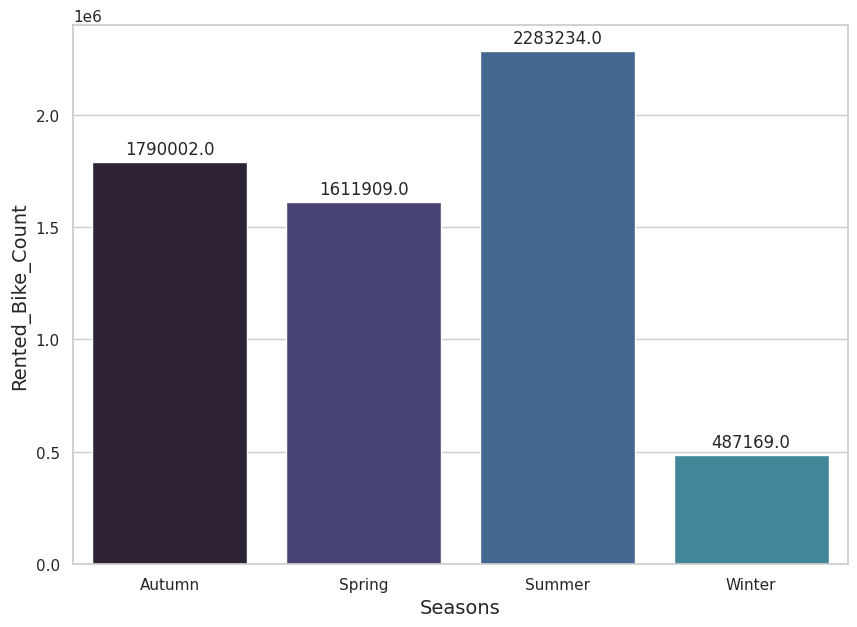

In [23]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=seasons_col,x='Seasons',y='Rented_Bike_Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
plt.show()

In [24]:
#Holidays column
holidays_col = create_df_analysis('Holiday')
holidays_col

,Holiday,Rented_Bike_Count
0,Holiday,215895
1,No Holiday,5956419


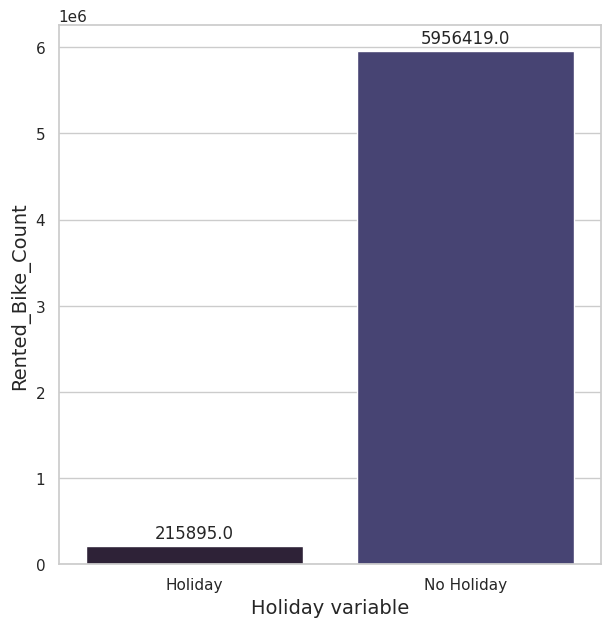

In [25]:
#Creating a visualisation for the holidays dataframe
plt.figure(figsize=(7,7))
splot = sns.barplot(data=holidays_col,x='Holiday',y='Rented_Bike_Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented_Bike_Count", size=14)
plt.show()

As we can see that the majority of the bikes rented are on days which are considered as No Holiday.

In [26]:
#weekday column
weekday_col = create_df_analysis('weekday')
weekday_col

,weekday,Rented_Bike_Count
0,Friday,898966
1,Monday,863563
2,Saturday,911475
3,Sunday,798295
4,Thursday,928267
5,Tuesday,862877
6,Wednesday,908871


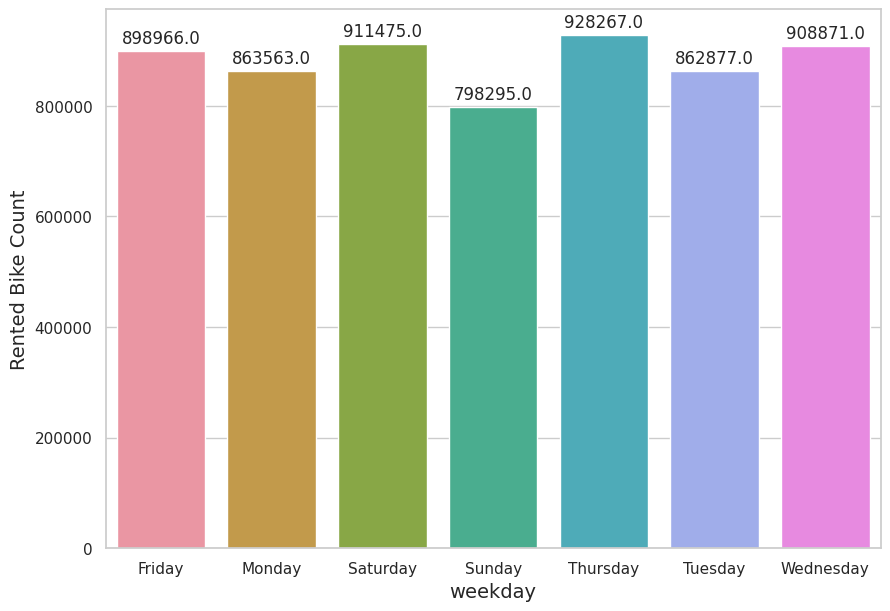

In [27]:
#Creating a visualisation for the weekdays column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=weekday_col,x='weekday',y='Rented_Bike_Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("weekday", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [28]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp_bike = create_df_analysis('Temperature')
temp_bike

,Temperature,Rented_Bike_Count
0,-17.800,322
1,-17.500,291
2,-17.400,64
3,-16.900,36
4,-16.500,96
...,...,...
541,38.000,1184
542,38.700,475
543,39.000,1033
544,39.300,531


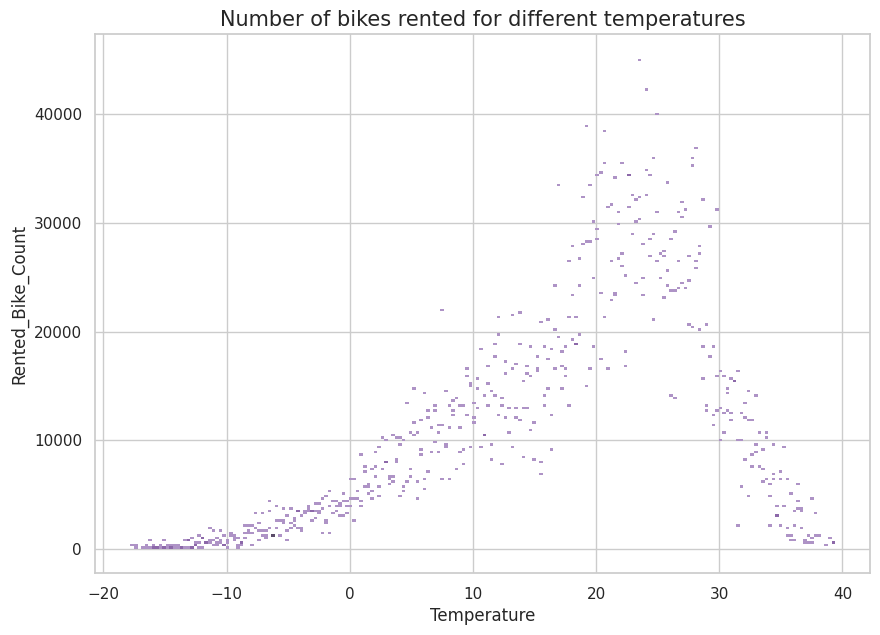

In [29]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.histplot(data=temp_bike,x='Temperature',y='Rented_Bike_Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.

In [30]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of rainfall
rainfall_bike = create_df_analysis('Rainfall')
rainfall_bike.head()

,Rainfall,Rented_Bike_Count
0,0.000,6086009
1,0.100,15179
2,0.200,3706
3,0.300,1401
4,0.400,2147


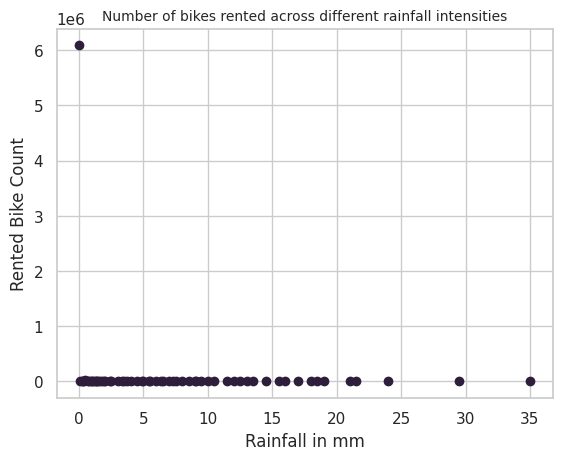

In [31]:
#Creating a visualisation for different rainfall intensities
plt.scatter(data=rainfall_bike,x='Rainfall',y='Rented_Bike_Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()




We can see here that most of the bikes are rented when there is no snowfall at all. A similar result is seen for rainfall too, i.e the most number of bikes are rented when there is no rainfall.

In [32]:
#Creating a dataframe for analysing the number of bikes rented for different humidity percentages.
humidity_bike = create_df_analysis('Humidity')
humidity_bike

,Humidity,Rented_Bike_Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


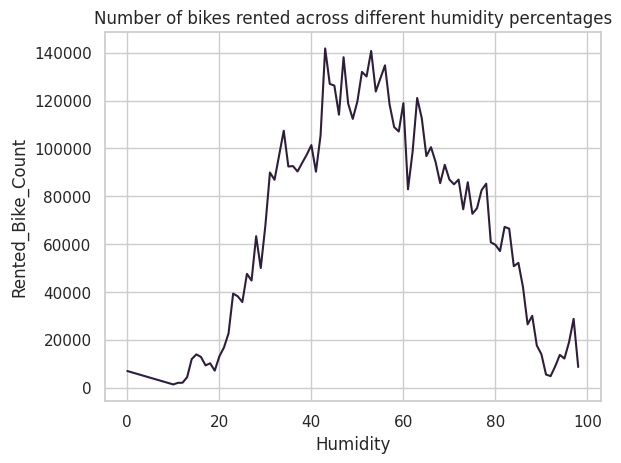

In [33]:
#Plotting a visualisation for the different humidity percentages
plt.plot(humidity_bike['Humidity'],humidity_bike['Rented_Bike_Count'])
plt.xlabel('Humidity')
plt.ylabel("Rented_Bike_Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()


As we can see that the majority of the bikes are rented for a humidity percentage range of 30 to 70

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

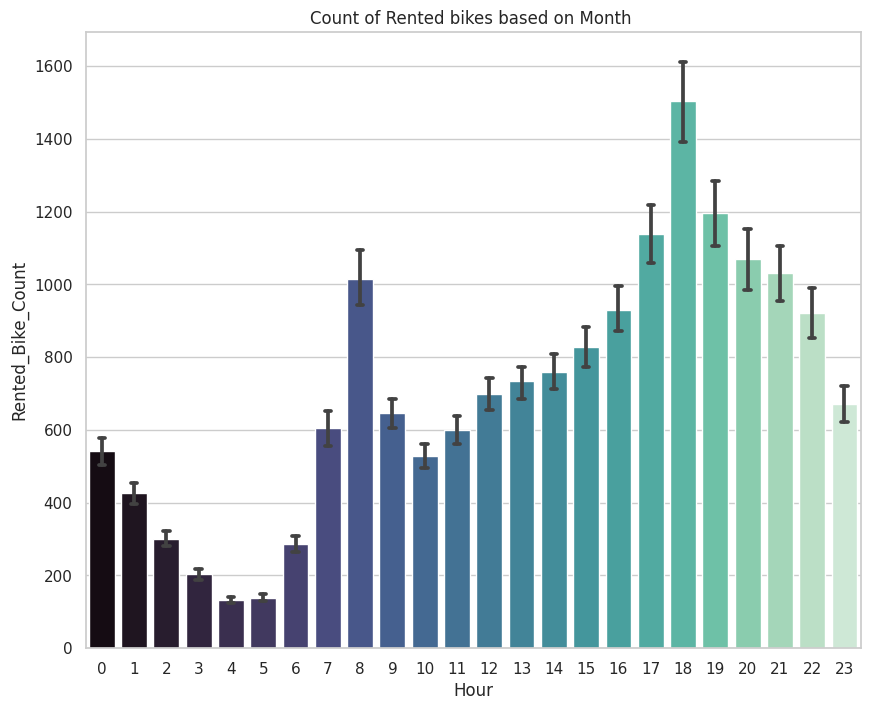

In [34]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_seolbikedata1,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Month ')

Here we can see that the highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

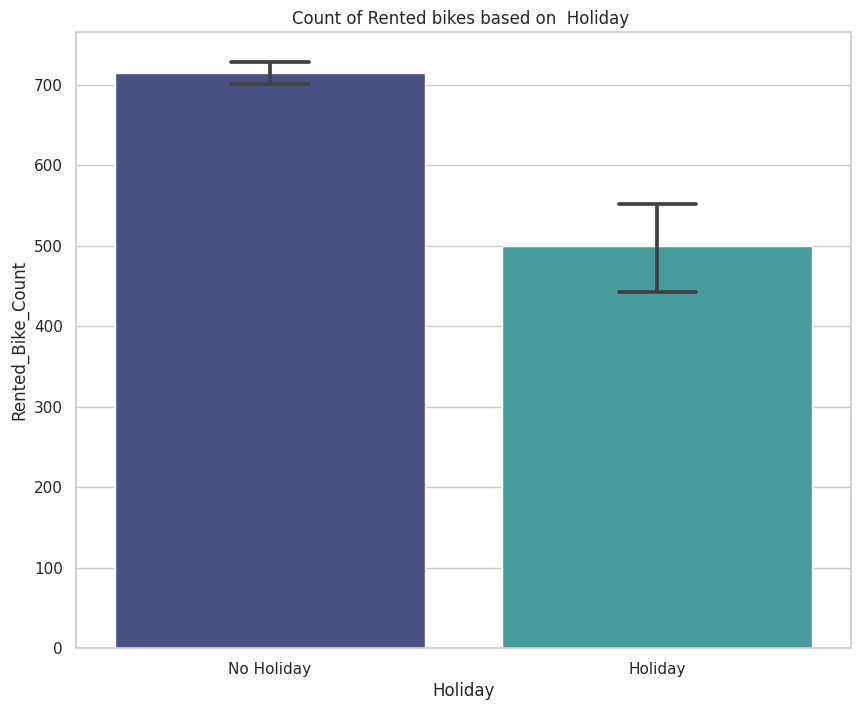

In [35]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_seolbikedata1,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.

[Text(0.5, 1.0, 'Count of Rented bikes based on  month ')]

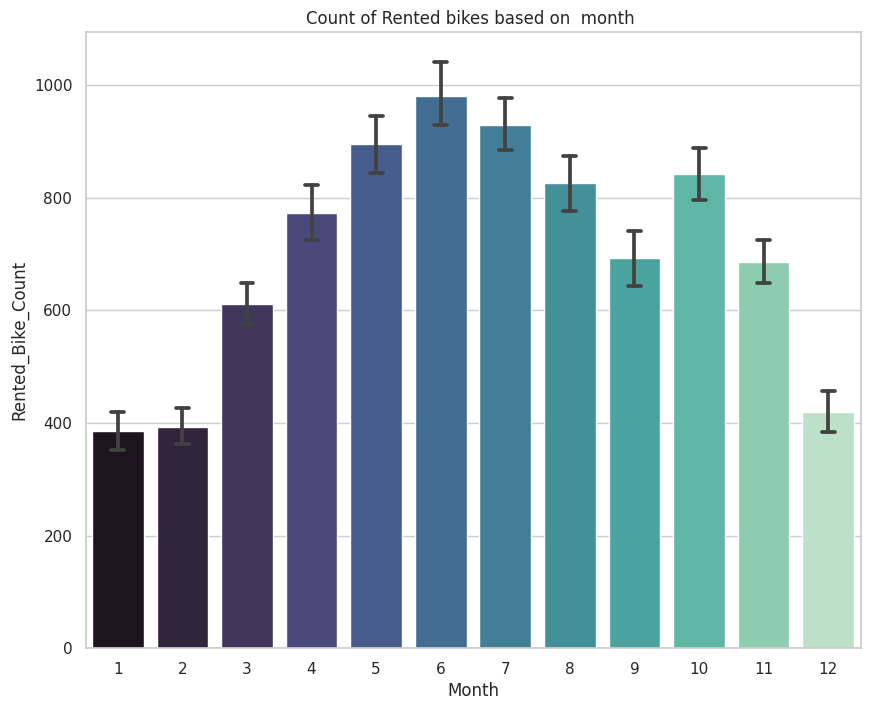

In [36]:
#anlysis of data by vizualisation using month and rented bike count.
Month = df_seolbikedata1.groupby("Month").sum().reset_index()

fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_seolbikedata1,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  month ')


Use of ranted bike count is more in 5th, 6th, and 07th Month

[Text(0.5, 1.0, 'Count of Rented bikes based on  Day ')]

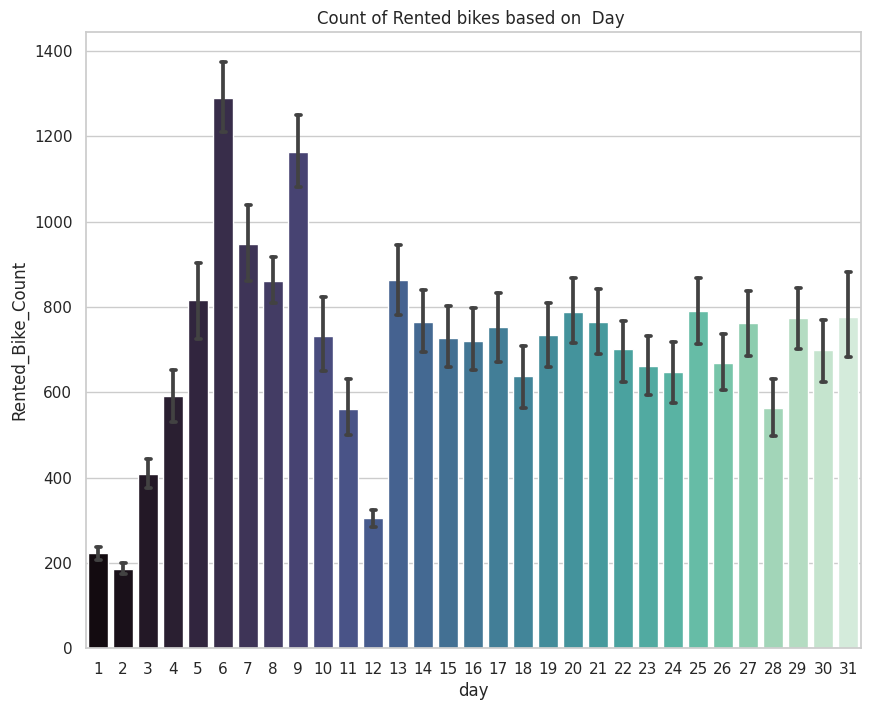

In [37]:
day = df_seolbikedata1.groupby("day").sum().reset_index()
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_seolbikedata1,x='day',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Day ')

**Visualizing numerical variables distplot** :

In [38]:
#assigning numerical coulmn to variable
num_feat= list(set(df_seolbikedata1.describe()))
num_feat

['Solar_Radiation',
 'Hour',
 'Temperature',
 'Visibility',
 'Rented_Bike_Count',
 'Wind_speed',
 'Dew_point_temperature',
 'Year',
 'Humidity',
 'Snowfall',
 'Rainfall',
 'Month',
 'day']

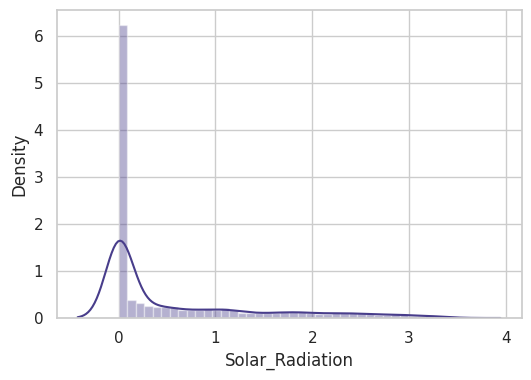

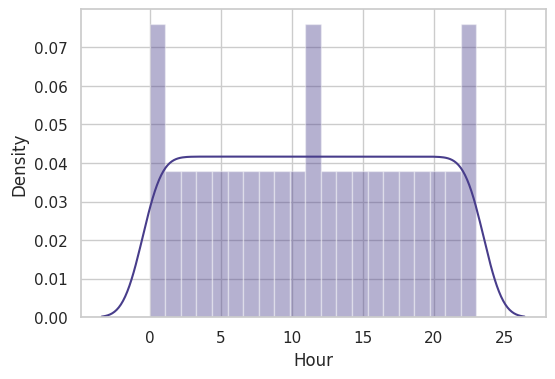

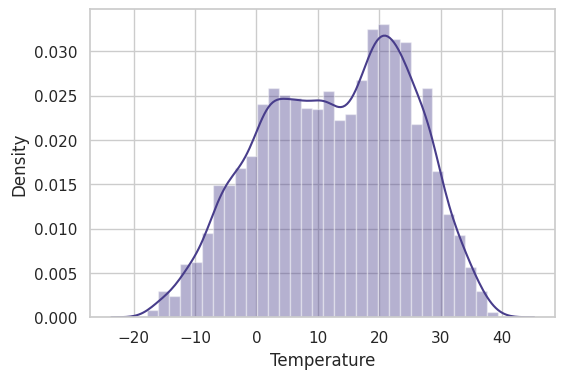

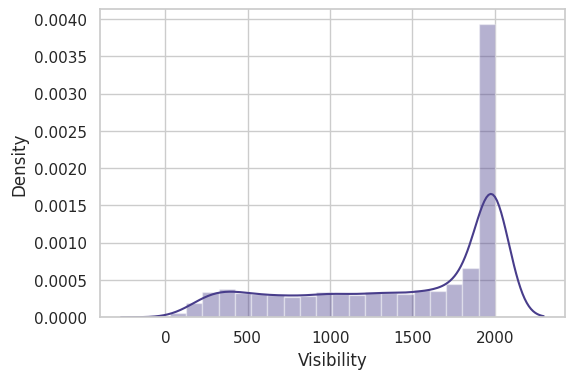

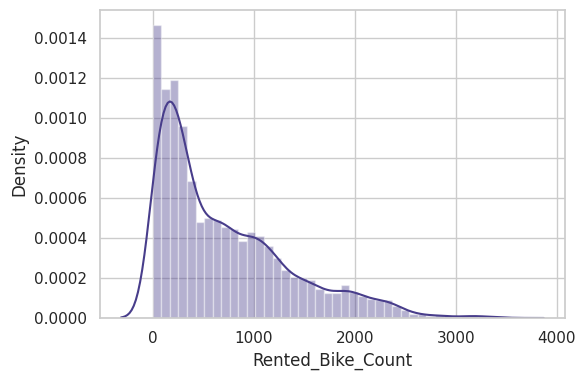

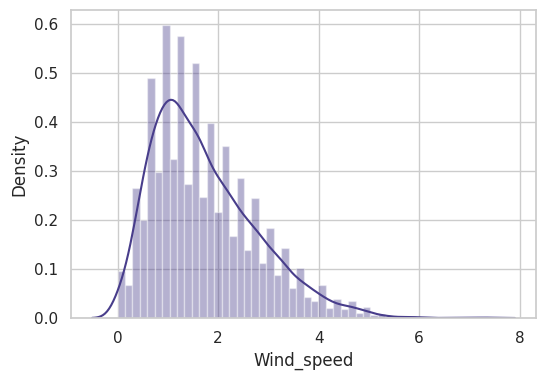

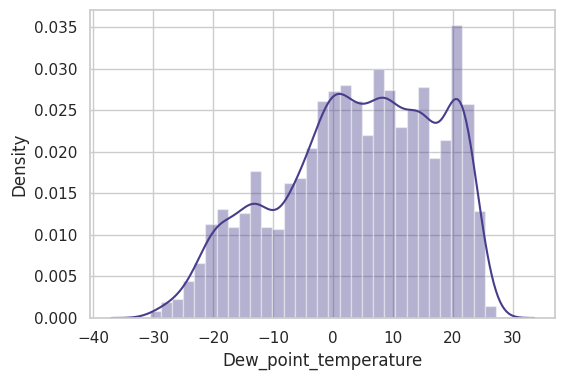

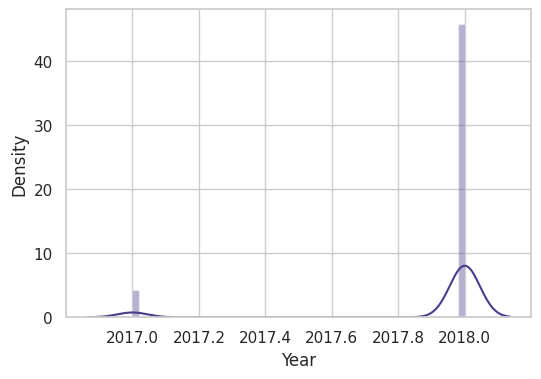

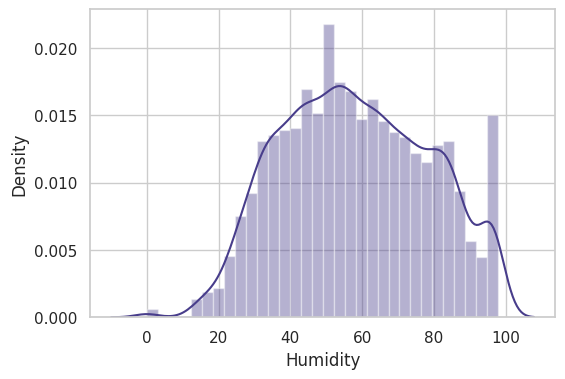

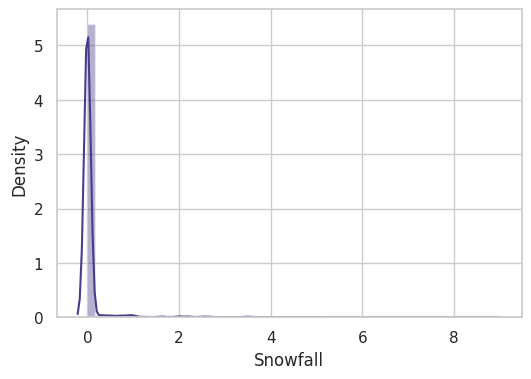

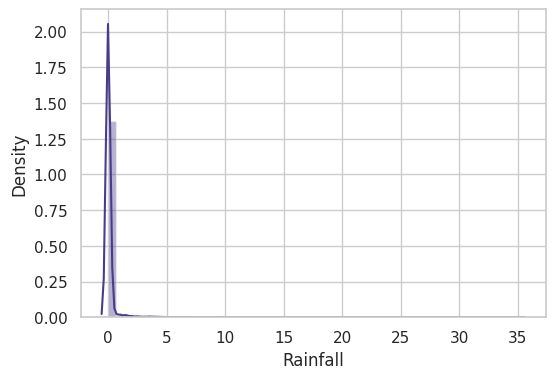

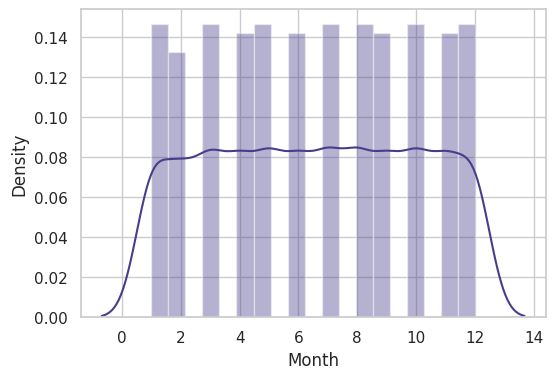

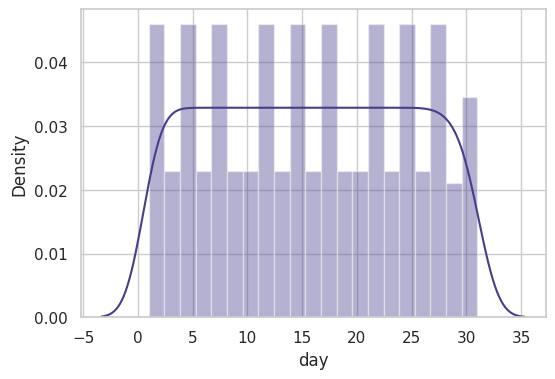

In [39]:
#plotting distplots to analyze the distribution of all numerical features
for col in num_feat:
  plt.figure(figsize=(6,4))
  sns.distplot(x=df_seolbikedata1[col],color= 'darkslateblue')
  plt.xlabel(col)
plt.show()

Some of the distributions are rightly skewed while some are leftly skewed. as we can see 2 columns (rainfall & snowfall) are highly skewed.

In [40]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 35 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in df_seolbikedata1.columns:
  if df_seolbikedata1[col].nunique() > 35:
    numerical_features.append(col)
  else:
    categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']
Categorical Features : ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'weekday', 'day', 'Month', 'Year']


In [41]:
# we do not want any transformation in our target variable as it is possible to have outlier is Seoul Environment
numerical_features.remove('Rented_Bike_Count')
# removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.
numerical_features.remove('Rainfall')
numerical_features.remove('Snowfall')

***Treating Outliers***

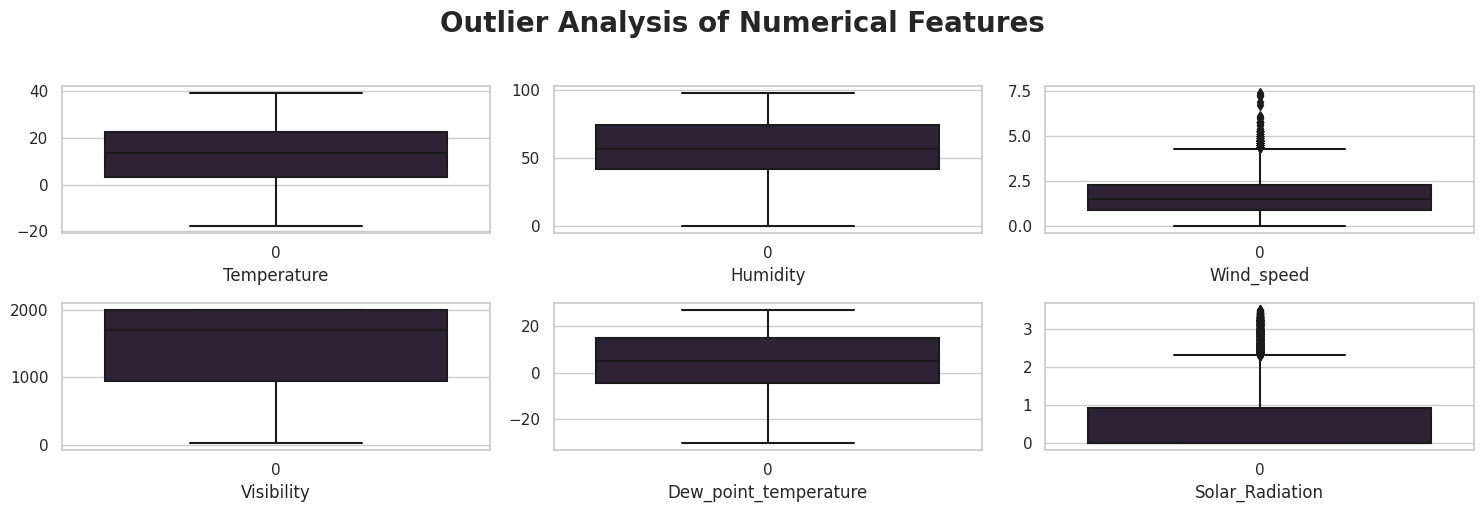

In [42]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            # subplot of 2 rows and 3 columns

  # countplot
  sns.boxplot(df_seolbikedata1[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

Observation:

Outliers are visible in the 'wind_speed', and 'solar_radiation' columns.

Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

***Clipping Method***: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [43]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(df_seolbikedata1):
    for col in df_seolbikedata1[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df_seolbikedata1[col].quantile(0.25)
        q3 = df_seolbikedata1[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df_seolbikedata1[col] = df_seolbikedata1[col].clip(lower_bound, upper_bound)
    return df_seolbikedata1

In [44]:
# using the function to treat outliers
df_seolbikedata1 = clip_outliers(df_seolbikedata1)

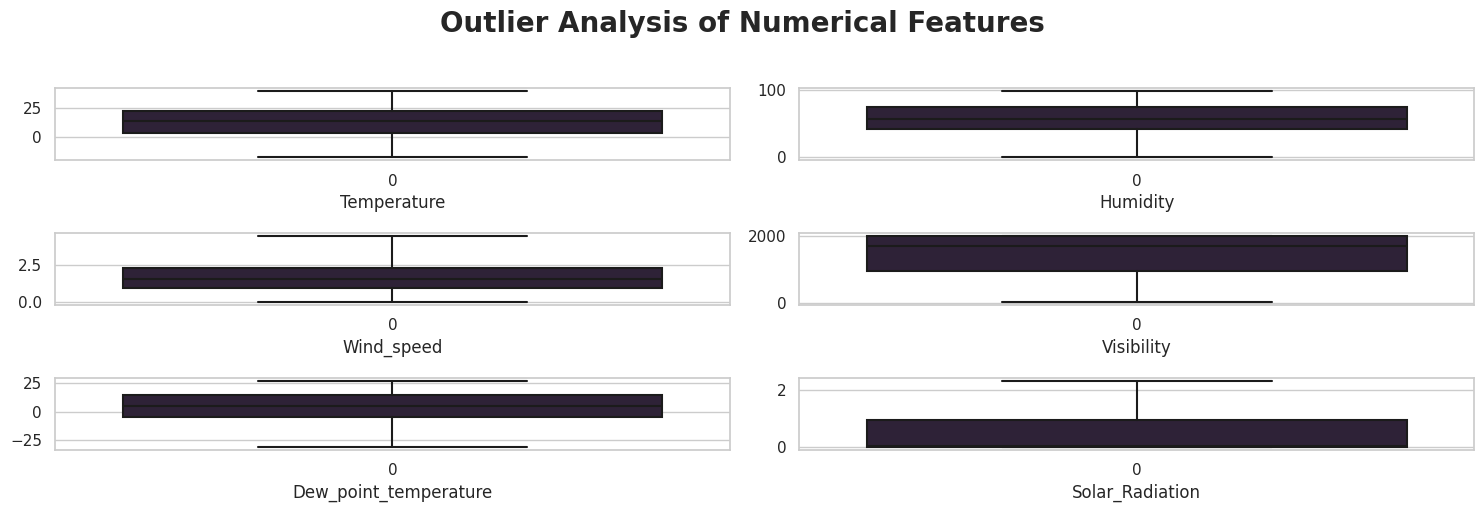

In [45]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)            # subplot of 3 rows and 2 columns

  # countplot
  sns.boxplot(df_seolbikedata1[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

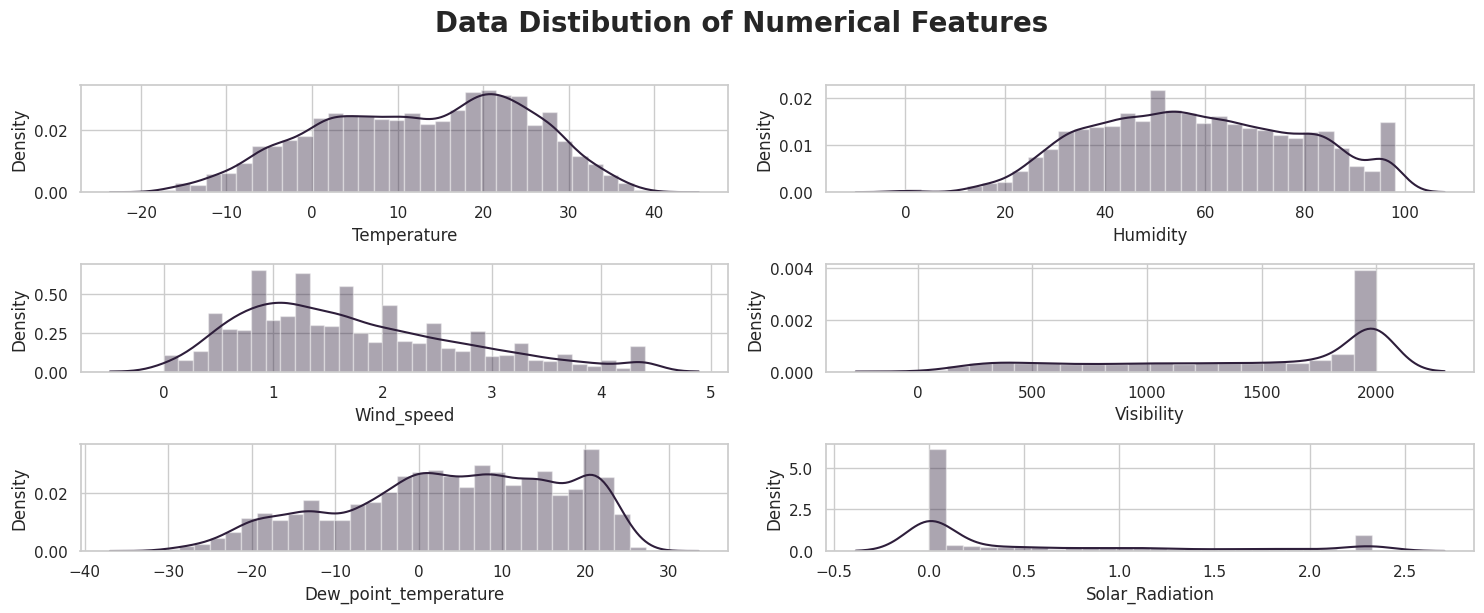

In [46]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)                       # subplots 3 rows, 2 columns

  # dist plots
  sns.distplot(df_seolbikedata1[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

**Regression Plotting Of Numeric Features**

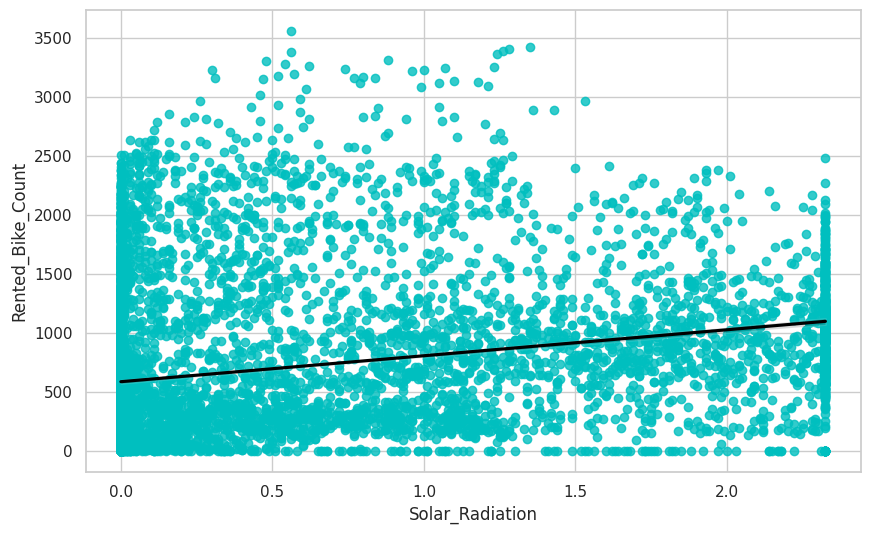

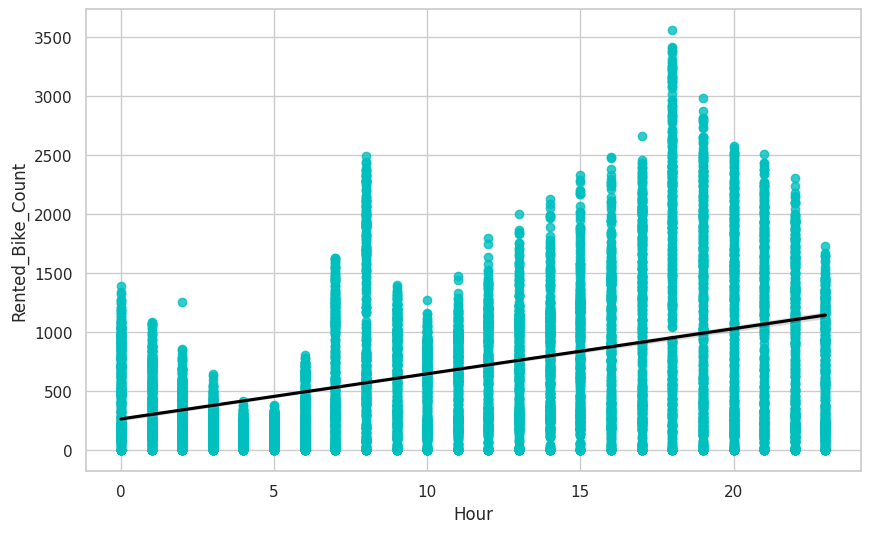

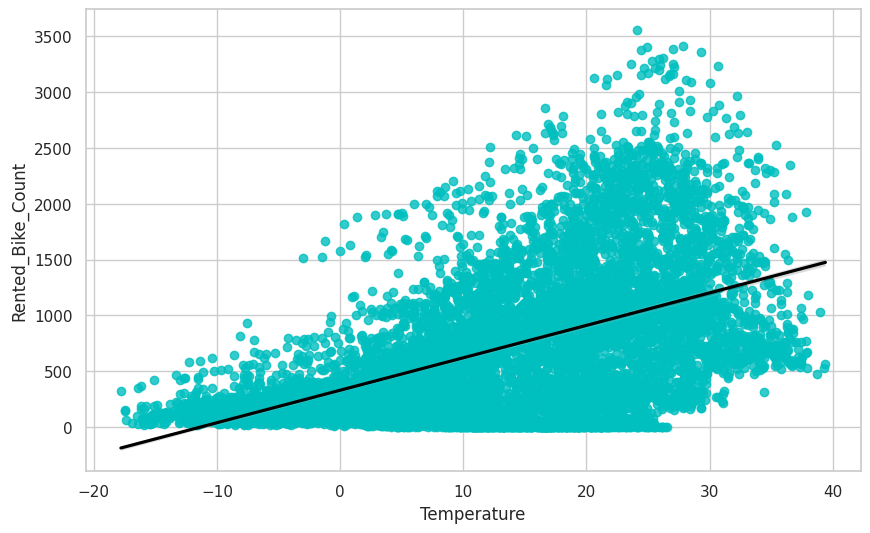

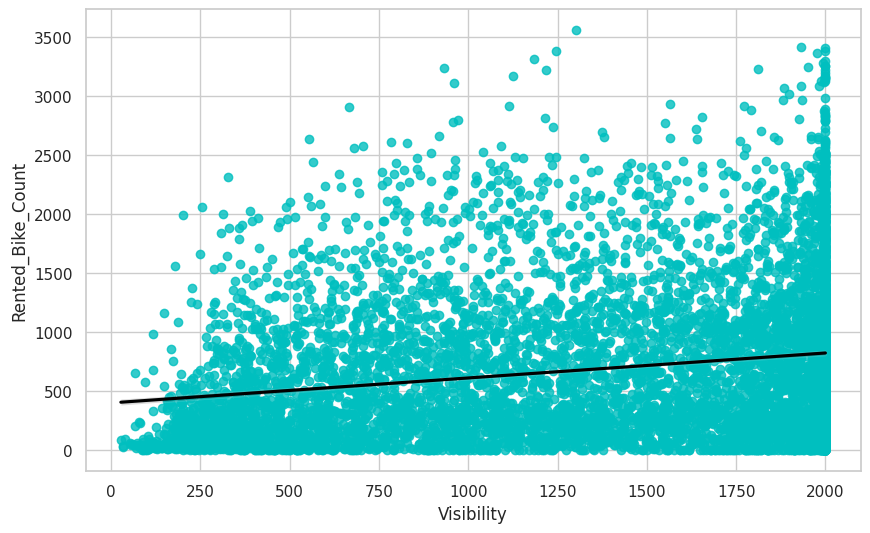

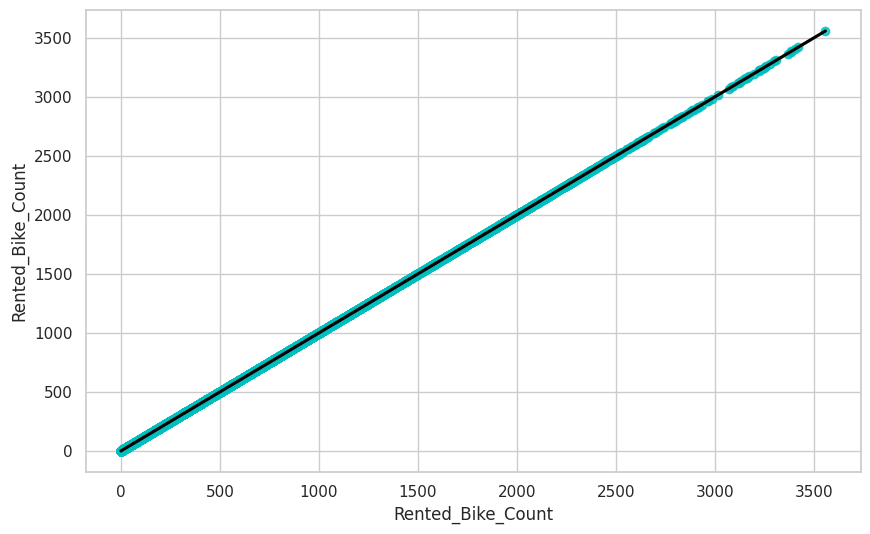

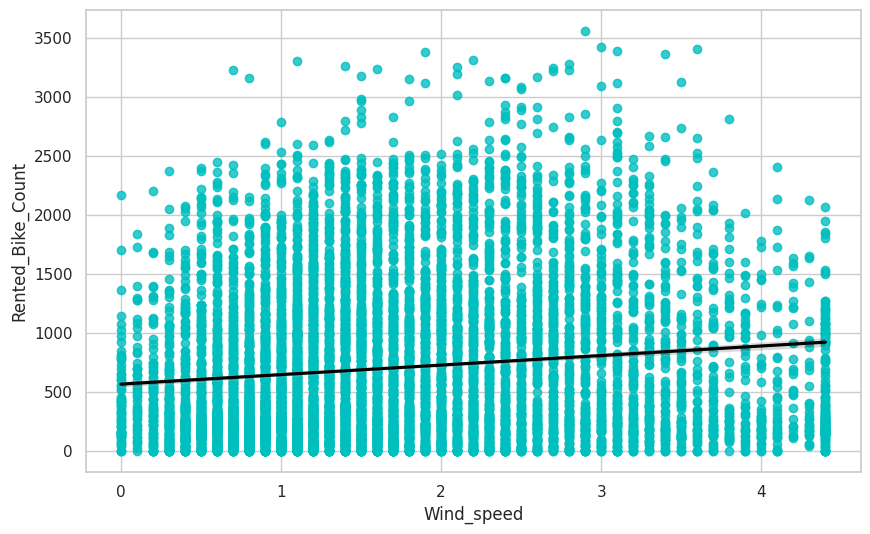

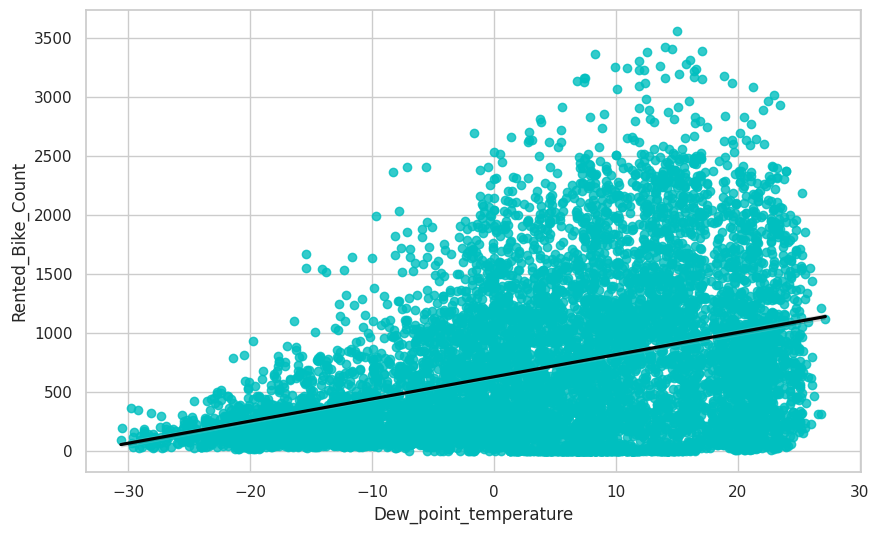

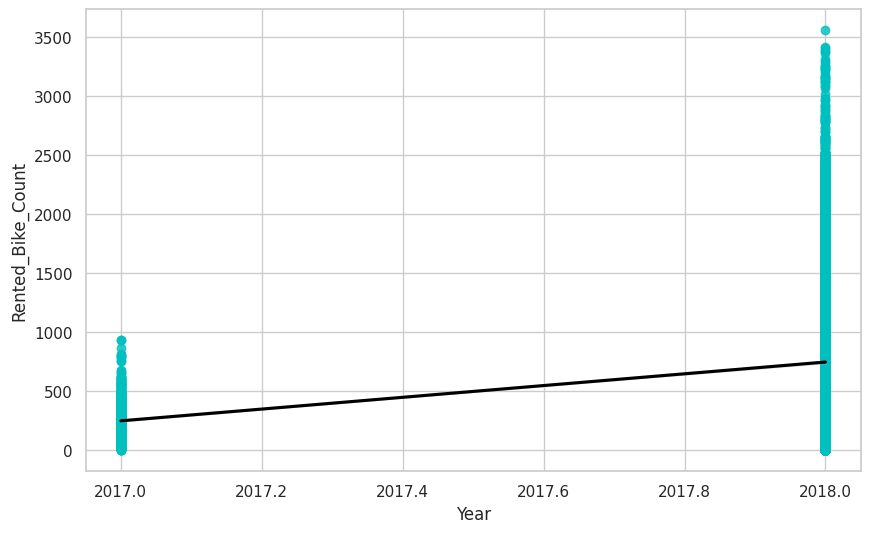

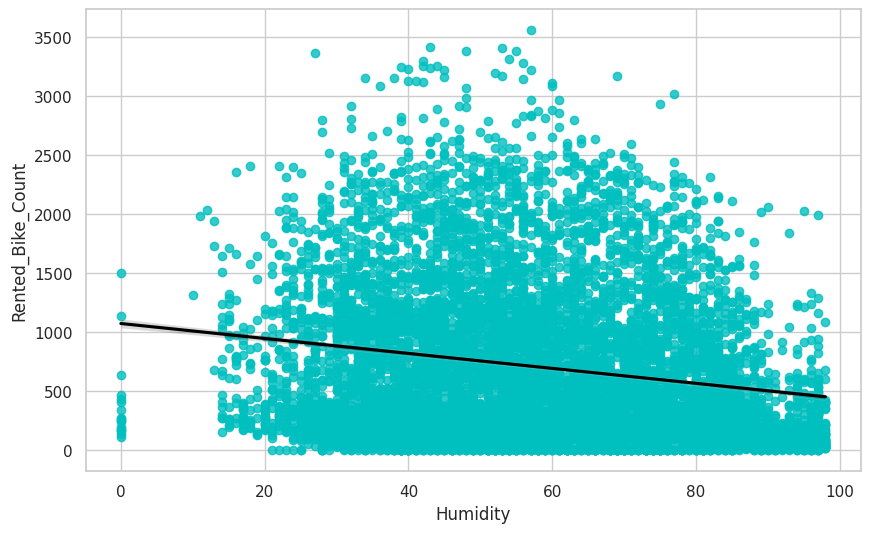

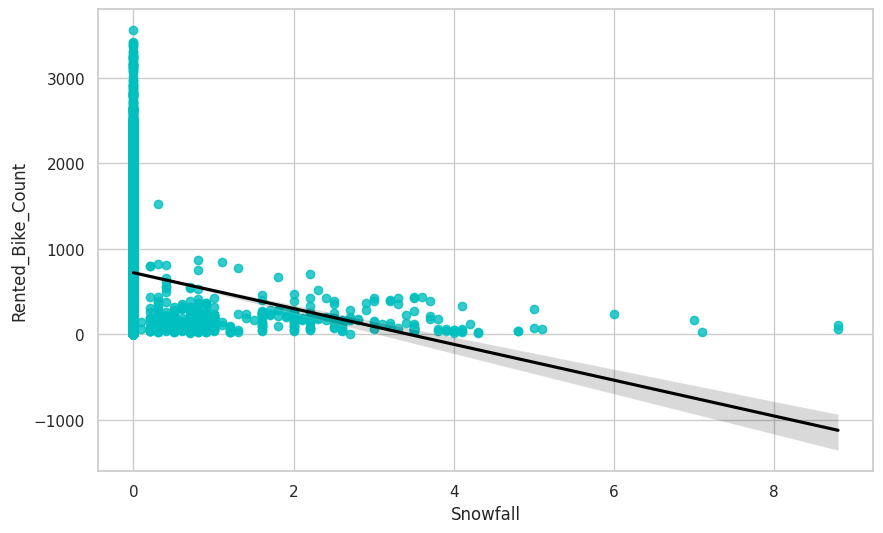

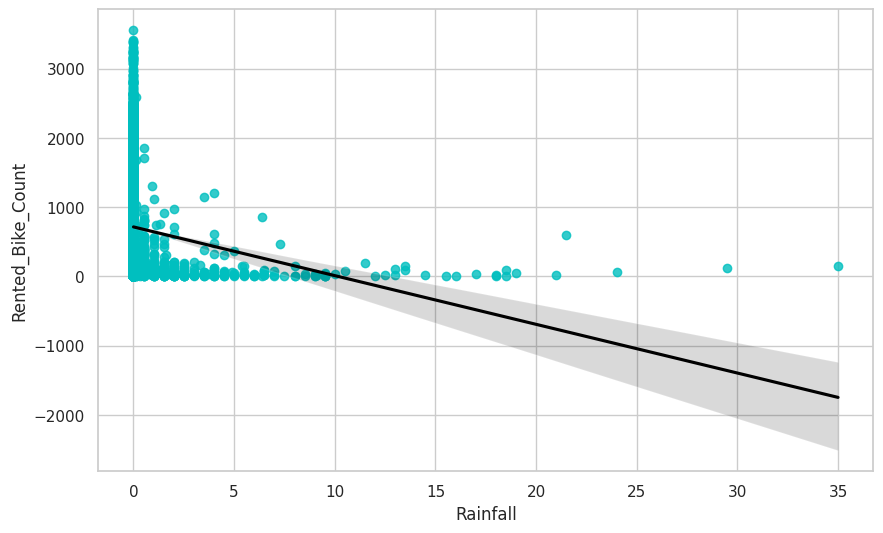

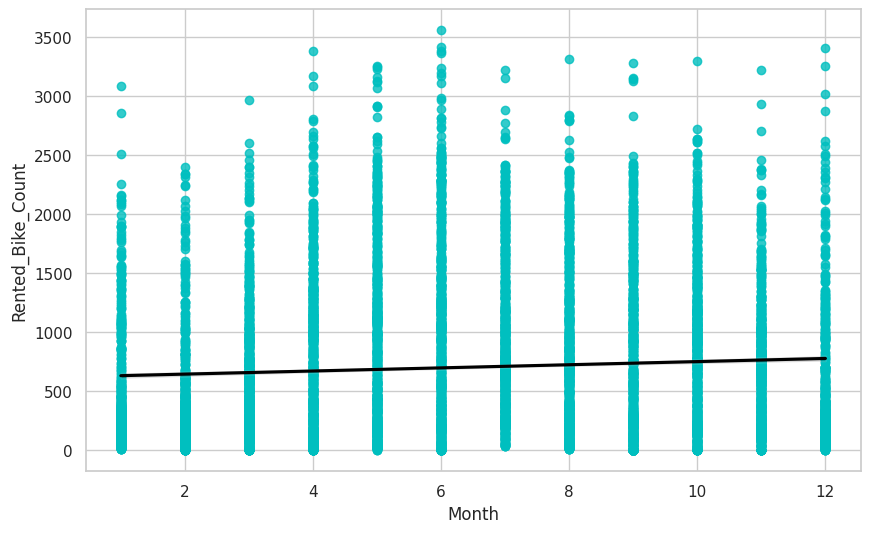

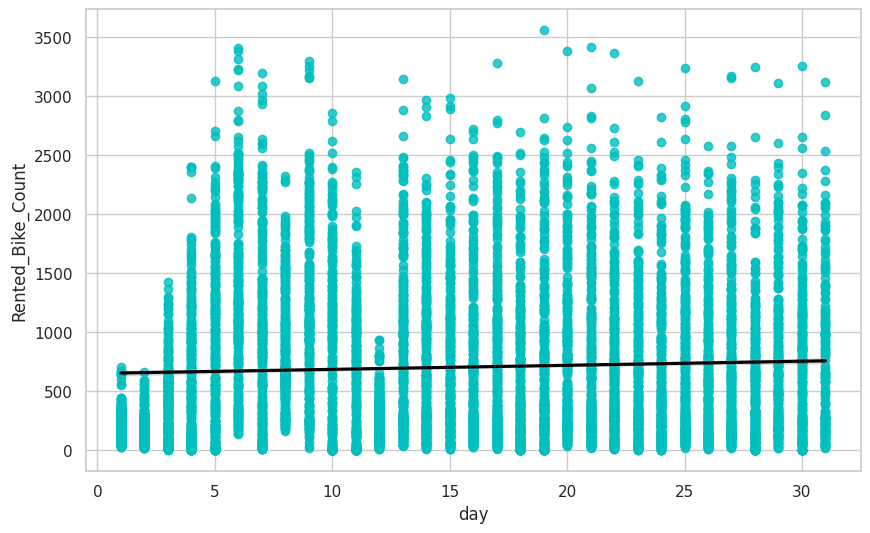

In [47]:
#plotting the regression plot for all the numerical features
for col in num_feat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df_seolbikedata1[col],y=df_seolbikedata1['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.

Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.

***Normalising Rented_Bike_Count Column Data.***

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

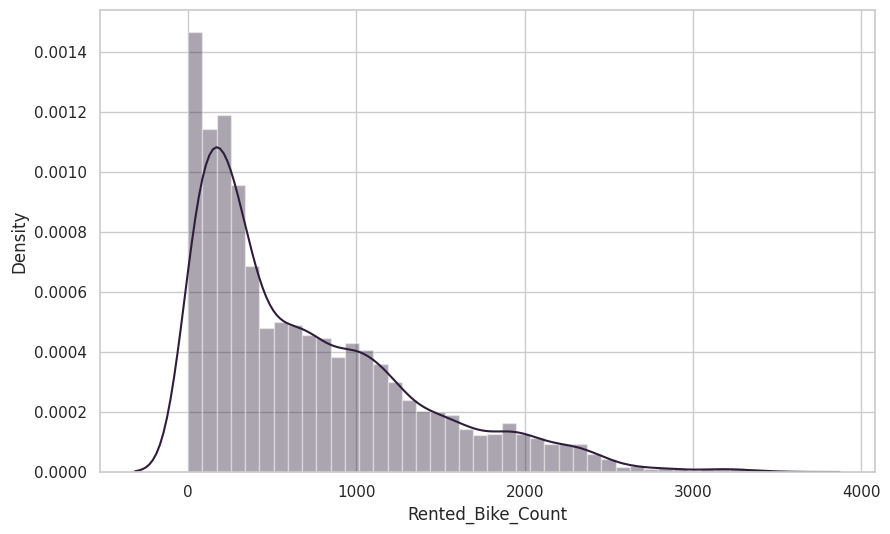

In [48]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(df_seolbikedata1['Rented_Bike_Count'])

Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

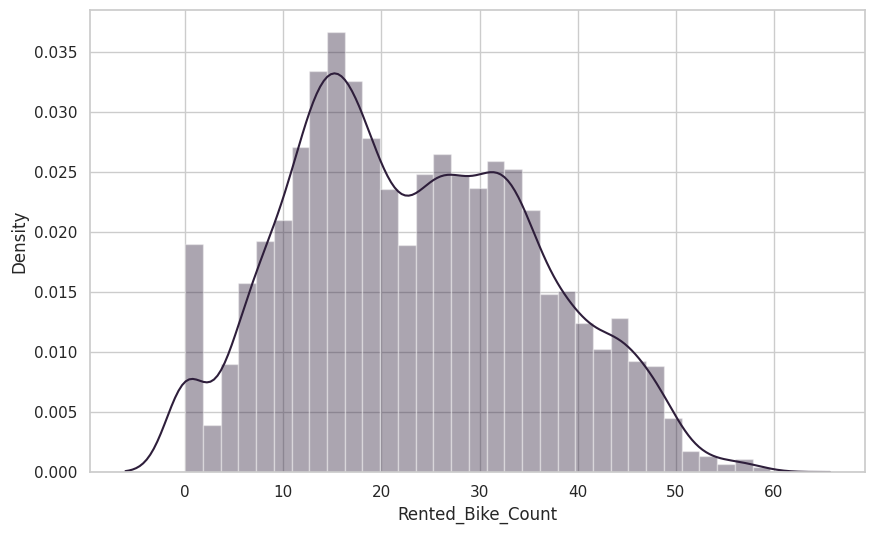

In [49]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df_seolbikedata1['Rented_Bike_Count']))

After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.

**Skew Data**

In [50]:
df_seolbikedata1.skew().sort_values(ascending=True)

Year                    -2.978
Visibility              -0.702
Dew_point_temperature   -0.367
Temperature             -0.198
Month                   -0.010
Hour                     0.000
day                      0.008
Humidity                 0.060
Wind_speed               0.715
Rented_Bike_Count        1.153
Solar_Radiation          1.267
Snowfall                 8.441
Rainfall                14.533
dtype: float64

**Remove Multicollinearity thru to Correlation Coefficient and Heatmap**





The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

<Axes: >

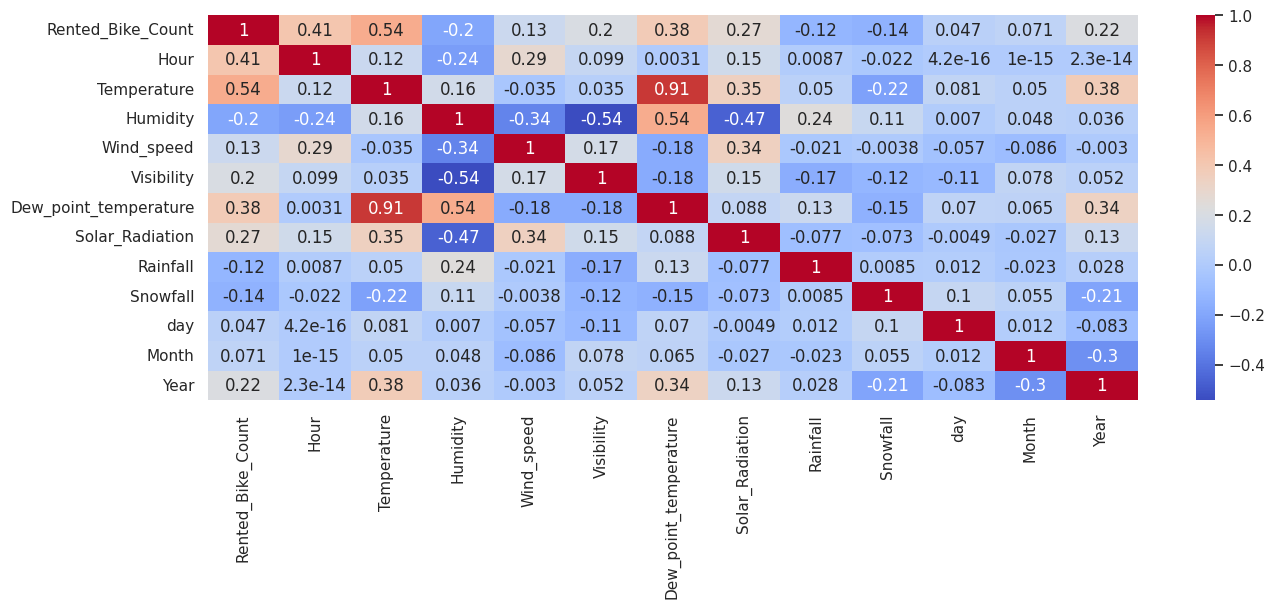

In [51]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_seolbikedata1.corr(), annot=True, cmap='coolwarm')

Humidity has low correlation with visibility due to solar radiation.
Dew point temperature and temperature are highly related.

In [52]:
def get_vif(df_seolbikedata1):
  vif = pd.DataFrame()
  vif["variables"] = df_seolbikedata1.columns
  vif["VIF"] = [variance_inflation_factor(df_seolbikedata1.values, i) for i in range(df_seolbikedata1.shape[1])]

  return vif

In [53]:
not_for_vif = ["day", "Month", "Year","Rented_Bike_Count"]
get_vif( df_seolbikedata1[[i for i in df_seolbikedata1.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,4.416
1,Temperature,33.456
2,Humidity,5.400
3,Wind_speed,5.013
4,Visibility,9.080
5,Dew_point_temperature,17.208
6,Solar_Radiation,2.974
7,Rainfall,1.082
8,Snowfall,1.121


As we can see Dew_point_temperature VIF is very hight so we will remove Dew_point_temperature also we can't remove Temprature becasue it is correlated with our dependent variable.

In [54]:
df_seolbikedata1.drop(["Dew_point_temperature"], axis=1, inplace=True)



#**Encoding**

In [55]:
df_seolbikedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Solar_Radiation    8760 non-null   float64
 7   Rainfall           8760 non-null   float64
 8   Snowfall           8760 non-null   float64
 9   Seasons            8760 non-null   object 
 10  Holiday            8760 non-null   object 
 11  Functioning_Day    8760 non-null   object 
 12  weekday            8760 non-null   object 
 13  day                8760 non-null   int64  
 14  Month              8760 non-null   int64  
 15  Year               8760 non-null   int64  
dtypes: float64(5), int64(7),

In [56]:
# Let's convert all the object Dtype into int64
cat_features = ["Seasons", "Holiday", "Functioning_day", "weekday"]

In [57]:
df_seolbikedata1["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [58]:
df_seolbikedata1["Functioning_Day"].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [59]:
df_seolbikedata1["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [60]:
df_seolbikedata1["weekday"].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: weekday, dtype: int64

In [61]:
df_seolbikedata1["Holiday"]=df_seolbikedata1["Holiday"].map({"No Holiday":0, "Holiday":1})
df_seolbikedata1["Functioning_Day"]=df_seolbikedata1["Functioning_Day"].map({"No":0, "Yes":1})

In [62]:
df_seasons = pd.get_dummies(df_seolbikedata1["Seasons"], drop_first = True)
df_weekday = pd.get_dummies(df_seolbikedata1["weekday"], drop_first = True)

In [63]:
df_seolbikedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Solar_Radiation    8760 non-null   float64
 7   Rainfall           8760 non-null   float64
 8   Snowfall           8760 non-null   float64
 9   Seasons            8760 non-null   object 
 10  Holiday            8760 non-null   int64  
 11  Functioning_Day    8760 non-null   int64  
 12  weekday            8760 non-null   object 
 13  day                8760 non-null   int64  
 14  Month              8760 non-null   int64  
 15  Year               8760 non-null   int64  
dtypes: float64(5), int64(9),

In [64]:
#Lets concat new created columns with our dataframe

df_seolbikedata1 = pd.concat([df_seolbikedata1, df_seasons, df_weekday], axis=1)

In [65]:
df_seolbikedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Solar_Radiation    8760 non-null   float64
 7   Rainfall           8760 non-null   float64
 8   Snowfall           8760 non-null   float64
 9   Seasons            8760 non-null   object 
 10  Holiday            8760 non-null   int64  
 11  Functioning_Day    8760 non-null   int64  
 12  weekday            8760 non-null   object 
 13  day                8760 non-null   int64  
 14  Month              8760 non-null   int64  
 15  Year               8760 non-null   int64  
 16  Spring             8760 

In [66]:
# As we have already apply one hot incoding with Seasons & weekday columns so we will remove these columns now.
df_seolbikedata1.drop(["Seasons", "weekday"], axis=1, inplace=True)


In [67]:
df_seolbikedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Solar_Radiation    8760 non-null   float64
 7   Rainfall           8760 non-null   float64
 8   Snowfall           8760 non-null   float64
 9   Holiday            8760 non-null   int64  
 10  Functioning_Day    8760 non-null   int64  
 11  day                8760 non-null   int64  
 12  Month              8760 non-null   int64  
 13  Year               8760 non-null   int64  
 14  Spring             8760 non-null   uint8  
 15  Summer             8760 non-null   uint8  
 16  Winter             8760 

In [68]:
df_seolbikedata1.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.200,37,2.200,2000,0.000,0.000,0.000,0,...,2017,0,0,1,0,0,0,1,0,0
1,204,1,-5.500,38,0.800,2000,0.000,0.000,0.000,0,...,2017,0,0,1,0,0,0,1,0,0
2,173,2,-6.000,39,1.000,2000,0.000,0.000,0.000,0,...,2017,0,0,1,0,0,0,1,0,0
3,107,3,-6.200,40,0.900,2000,0.000,0.000,0.000,0,...,2017,0,0,1,0,0,0,1,0,0
4,78,4,-6.000,36,2.300,2000,0.000,0.000,0.000,0,...,2017,0,0,1,0,0,0,1,0,0


In [69]:
df_seolbikedata1.shape

(8760, 23)

##**Split Data for Training & testing**

In [70]:
x = df_seolbikedata1.drop("Rented_Bike_Count", axis=1)
y = df_seolbikedata1["Rented_Bike_Count"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (7008, 22)
Shape of y_train : (7008,)
Shape of x_test : (1752, 22)
Shape of y_test : (1752,)


##**Scaling**

In [71]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

##**Training Machine learning model**

###**Linear Regression model**

In [72]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(x_test)

In [74]:
y_pred


array([  84.43564517,  972.48606591, 1404.8264872 , ..., 1540.79343972,
        501.42735121,  802.92041423])

**Model Evaluation**

In [76]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name}:['MSE' :{round(MSE,3)}, 'RMSE' :{round(RMSE,3)}, 'MAE' :{round(MAE,3)}, 'R2' :{round(R2,3)}]")

In [77]:
get_metrics(y_test, y_pred, "LinerRegression")

LinerRegression:['MSE' :189426.058, 'RMSE' :435.231, 'MAE' :330.856, 'R2' :0.536]


##**Train Multiple Models**

In [78]:
rir = Ridge().fit(x_train, y_train)
y_pred_rir = rir.predict(x_test)

lar = Lasso().fit(x_train, y_train)
y_pred_lar = lar.predict(x_test)

svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

xgbr = XGBRegressor().fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(x_test)

In [79]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

Ridge:['MSE' :189425.12, 'RMSE' :435.23, 'MAE' :330.85, 'R2' :0.536]
Lasso:['MSE' :189367.52, 'RMSE' :435.164, 'MAE' :330.523, 'R2' :0.536]
SVR:['MSE' :318131.412, 'RMSE' :564.031, 'MAE' :385.907, 'R2' :0.221]
DecisionTreeRegressor:['MSE' :83859.0, 'RMSE' :289.584, 'MAE' :162.774, 'R2' :0.795]
RandomForestRegressor:['MSE' :40435.721, 'RMSE' :201.086, 'MAE' :120.784, 'R2' :0.901]
XGBRegressor:['MSE' :33816.102, 'RMSE' :183.892, 'MAE' :115.121, 'R2' :0.917]


##**Visualise Model Prediction**

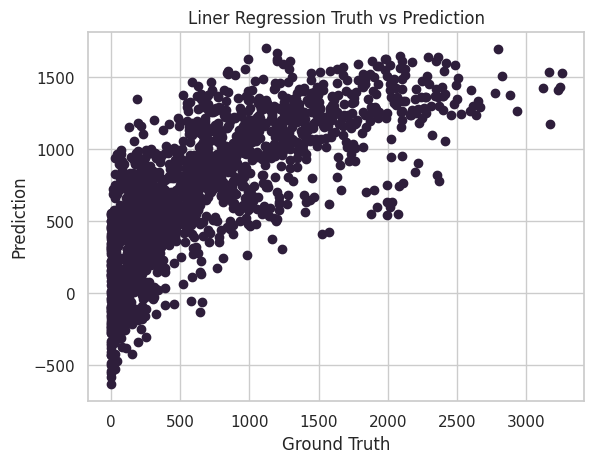

In [80]:
plt.scatter(y_test, y_pred)
plt.title("Liner Regression Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

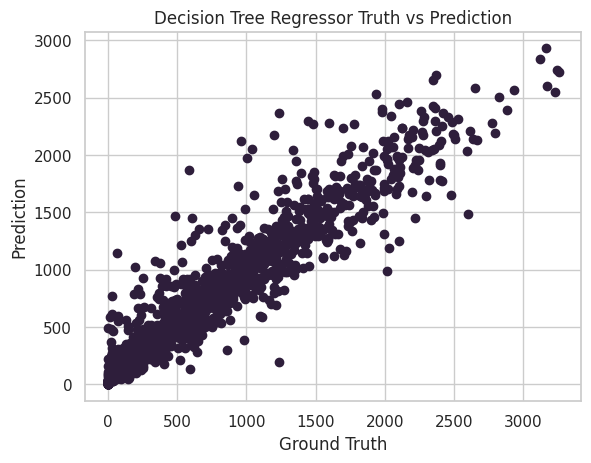

In [81]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Decision Tree Regressor Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

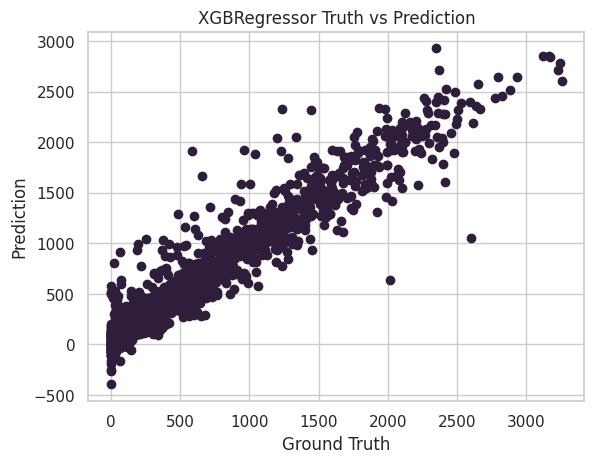

In [82]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGBRegressor Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

In [83]:
import time
start_time = time.time()

#**Hyperparameter tuning XG boost Regressor with GridSearchCV**

In [84]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [85]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [86]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[17:16:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[17:16:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[17:16:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[17:16:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[17:16:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [87]:
y_pred_xgb_grid = xg_grid.predict(x_test)
get_metrics(y_test, y_pred_xgb_grid, "XGBRegressor with best parameters")

print("TIme taken to training using grid search : ", time.time()-start_time)
print("Best parameters:", xg_grid.best_params_)

XGBRegressor with best parameters:['MSE' :33452.434, 'RMSE' :182.9, 'MAE' :107.14, 'R2' :0.918]
TIme taken to training using grid search :  219.25865411758423
Best parameters: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [88]:
xg_boost = xgb.XGBRegressor(max_depth=8,
                            min_samples_leaf=40,
                            min_sample_split=50,
                            n_estimators=100,)
xg_boost.fit(x_train, y_train)

y_pred_tuned = xg_boost.predict(x_test)
get_metrics(y_test, y_pred_tuned, "XGBRegressor with best parameters")

[17:19:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sample_split", "min_samples_leaf" } are not used.

XGBRegressor with best parameters:['MSE' :33452.434, 'RMSE' :182.9, 'MAE' :107.14, 'R2' :0.918]


##***Basic Insights***

In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Support Vector Regression,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.

Final Observations:

Out of all above models XGBRegressor gives the highest R2 score of .918

No overfitting is seen.

We can deploy XG Boost Gridsearch CV model.